# Air Pollution - Challenge

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Data Loading

In [2]:
train_data=pd.read_csv('./Training Data/Train.csv')

In [3]:
train_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [4]:
train_data.shape

(1600, 6)

In [5]:
y_train=train_data['target']
y_train=np.array(y_train)

In [6]:
y_train.shape

(1600,)

In [7]:
x_train= train_data.drop(['target'],axis=1)

In [8]:
x_train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5
0,0.293416,-0.945599,-0.421105,0.406816,0.525662
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997
2,0.236425,0.132836,-0.147723,0.699854,-0.187364
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077


In [9]:
x_train=np.array(x_train)
print(x_train)

[[ 0.29341624 -0.94559871 -0.42110515  0.40681602  0.52566183]
 [-0.83608408 -0.18922804 -0.77640262 -1.05383124  0.59799685]
 [ 0.23642511  0.13283602 -0.14772298  0.69985396 -0.18736416]
 ...
 [ 1.04417694 -0.89920649  1.73039905 -1.87105676  0.44251965]
 [-1.2691729  -0.00505216  1.85766873 -1.08036482  0.73633394]
 [-1.88400025 -0.84942743 -1.45227035  0.48861308  1.4595758 ]]


In [10]:
x_train.shape

(1600, 5)

Linear Regression Algorithm

In [11]:
def hypothesis(x,t):
    return np.dot(x,t)

In [12]:
def loss(x,y,t):
    yh=hypothesis(x,t)
    e=np.sum((yh-y)**2)
    return e/(x.shape[0])

In [13]:
def grad(x,y,t):
    yh=hypothesis(x,t)
    k=np.sum(np.dot(x.T,(yh-y)))
    return k/(x.shape[0])

In [14]:
def grad_d(x,y,lr=0.1,mi=1000):
    el=[]
    t=np.zeros((x.shape[1],))
    for i in range(mi):
        e=loss(x,y,t)
        el.append(e)
        g=grad(x,y,t)
        t=t-lr*g
    return t,el

In [15]:
final_theta,final_error=grad_d(x_train,y_train)

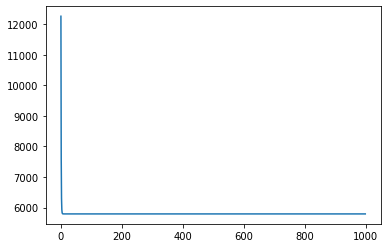

In [16]:
plt.plot(final_error)

In [17]:
final_theta

array([37.05405055, 37.05405055, 37.05405055, 37.05405055, 37.05405055])

Accuracy

In [18]:
ypred=hypothesis(x_train,final_theta)
def r2_score(y,yhat):
    num=np.sum((y-yhat)**2)
    denom=np.sum((y-y.mean())**2)
    r2=1-(num/denom)
    return r2*100

In [19]:
ypred

array([ -5.21757226, -83.65133959,  27.19870876, ...,  16.55695005,
         8.8712139 , -82.90877758])

In [20]:
y_train

array([ -82.15466656,  -48.89796018,   77.2703707 , ..., -107.51050797,
        -47.34155781, -115.93900296])

In [21]:
r2_score(y_train,ypred)

52.73591438016969

Testing Data

In [22]:
x_test=pd.read_csv("./Testing Data/Test.csv")

In [23]:
x_test

,feature_1,feature_2,feature_3,feature_4,feature_5
0,1.015254,2.076209,-0.266435,-2.418088,-0.980503
1,-0.375021,0.953185,0.626719,0.704406,-0.355489
2,-1.024452,0.962991,-0.407942,-1.861274,0.455201
3,-2.489841,0.544802,0.601219,-0.607021,-1.314286
4,-0.384675,-0.833624,1.358552,-0.547932,0.411925
...,...,...,...,...,...
395,-0.436959,-0.575844,-1.620908,-0.222588,1.086013
396,-0.421324,-2.417543,0.876275,0.844565,0.171646
397,0.554728,1.768243,-0.897787,-1.193661,0.340563
398,-1.627172,0.856471,-0.000566,0.629387,0.453382


In [24]:
x_test=np.array(x_test)

In [25]:
x_test.shape

(400, 5)

In [26]:
y_test=hypothesis(x_test,final_theta)

In [27]:
y_test.shape

(400,)

Convert to csv

In [28]:
y_df=pd.DataFrame(y_test,columns=['target'])

In [29]:
y_df

,target
0,-21.252814
1,57.574547
2,-69.493968
3,-120.986217
4,0.157353
...,...
395,-65.596267
396,-35.067306
397,21.198110
398,11.542396


In [30]:
y_df.to_csv('./Testing Data/y_test.csv',index=False)

In [31]:
y_test=pd.read_csv('./Testing Data/y_test.csv')

In [32]:
y_test

,target
0,-21.252814
1,57.574547
2,-69.493968
3,-120.986217
4,0.157353
...,...
395,-65.596267
396,-35.067306
397,21.198110
398,11.542396
